# Exploratory Data Calon Pembeli Mobil
Pada kali ini saya Dhafin Kurniawan dengan NRP 5054231016
Akan melakukan Exploratory Data Analysis
 pada dataset Calon Pembeli Mobil.

### Data:
Data yang saya gunakan pada praktikum kali ini didapatkan dari Kaggle 'https://www.kaggle.com/datasets/ajieraflipamungkas/dataset-calon-pembeli-mobil'.
Dataset ini berisi informasi mengenai calon pembeli mobil, termasuk data seperti usia, pendapatan, dan minat untuk membeli mobil. Dataset ini bisa digunakan untuk menganalisis profil pembeli atau memprediksi calon pelanggan yang potensial.

### Metadata


- Usia: Usia calon pembeli mobil
- Status: Status pernikahan calon pembeli (0=single, 1=menikah, 2=menikah mempunyai anak, 3=duda/janda)
- Kelamin: Jenis kelamin calon pembeli (0=pria, 1=wanita).
- Memiliki Mobil: Jumlah mobil yang dimiliki calon pembeli.
- Penghasilan: Penghasilan calon pembeli dalam setahun.
- Beli Mobil (Target): Apakah calon pembeli mobil benar benar membeli mobil atau tidak (0=tidak membeli, 1=membeli mobil)

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('calonpembelimobil.csv')
data

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


### Memahami Data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


disini kita mendapatkan info bahwa semua data memiliki tipe integer.

In [8]:
data.head()
# menampilkan 5 data terawal

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [9]:
data.nunique()

ID                1000
Usia                44
Status               4
Kelamin              2
Memiliki_Mobil       5
Penghasilan        314
Beli_Mobil           2
dtype: int64

disini didapatkan data yang unik seperti kolom 'Kelamin' dan 'Beli_Mobil' yang memiliki hanya 2 tipe.

In [10]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

disini juga tidak ada data yang duplikat.

### Mengeck null 

In [11]:
# Mengecek apakah ada missing value di dalam data
print("\nJumlah missing values per kolom:\n", data.isnull().sum())


Jumlah missing values per kolom:
 ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64


disini sudah diketahui bahwa tidak ada data yang null.

In [12]:
data.describe().T
#untuk menampilkan nilai nilainya

,count,mean,std,min,25%,50%,75%,max
ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Usia,1000.0,43.532,12.672078,24.0,33.00,43.0,53.00,164.0
Status,1000.0,1.469,1.073402,0.0,1.00,1.0,2.00,3.0
Kelamin,1000.0,0.481,0.499889,0.0,0.00,0.0,1.00,1.0
Memiliki_Mobil,1000.0,0.952,0.801460,0.0,0.00,1.0,2.00,4.0
Penghasilan,1000.0,270.090,95.236810,95.0,187.00,258.5,352.25,490.0
Beli_Mobil,1000.0,0.633,0.482228,0.0,0.00,1.0,1.00,1.0


Disini kita mendapatkan sedikit info seperti :
1. rentang umurnya minimal 14 tahun dan maksimal 61 tahun, dan 50% nya umur 43 tahun.
2. Penghasilan orang orang yang berada di data, setengahnya memiliki penghasilan 258 jt.

In [13]:
data_baru = data.drop(["ID"], axis=1)
data_baru

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,32,1,0,0,240,1
1,49,2,1,1,100,0
2,52,1,0,2,250,1
3,26,2,1,1,130,0
4,45,3,0,2,237,1
...,...,...,...,...,...,...
995,51,0,1,2,293,1
996,61,1,0,2,275,1
997,45,1,0,0,406,1
998,48,0,1,2,432,1


pada kode diatas saya mendrop data "ID" karena tidak terlalu  memiliki makna ke kolom kolom yang lain. Dan juga agar lebih rapih.
Serta mengganti namanya yang tadinya 'data' menjadi 'data_baru' agar bisa ilang.

In [14]:
#disini saya coba untuk memisahkan data datanya
cat_cols=data_baru.select_dtypes(include=['object']).columns
num_cols = data_baru.select_dtypes(include=np.number).columns.tolist()

print("categorical variables:")
print(cat_cols)

print("numerical catagories:")
print(num_cols)

categorical variables:
Index([], dtype='object')
numerical catagories:
['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan', 'Beli_Mobil']


setelah dipisah, ternyata tidak ada data dengan type object.

Usia
Skew : 1.25


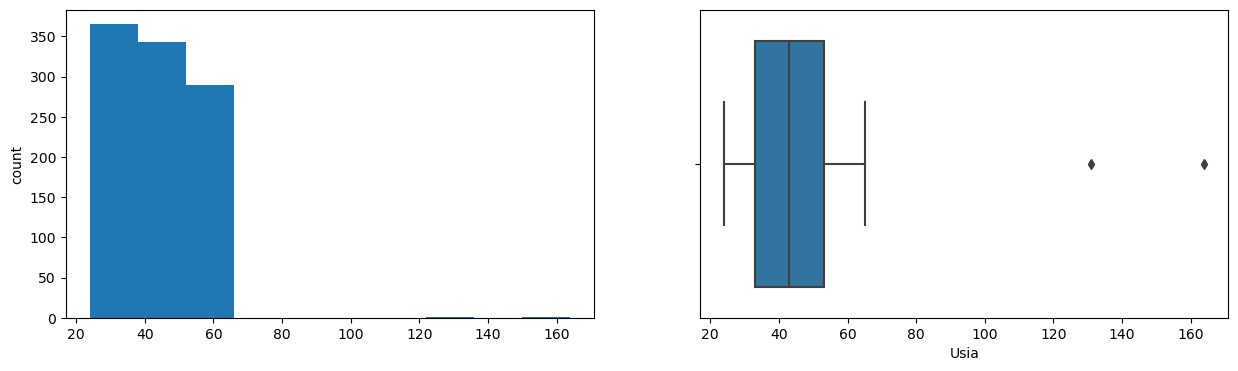

Status
Skew : 0.01


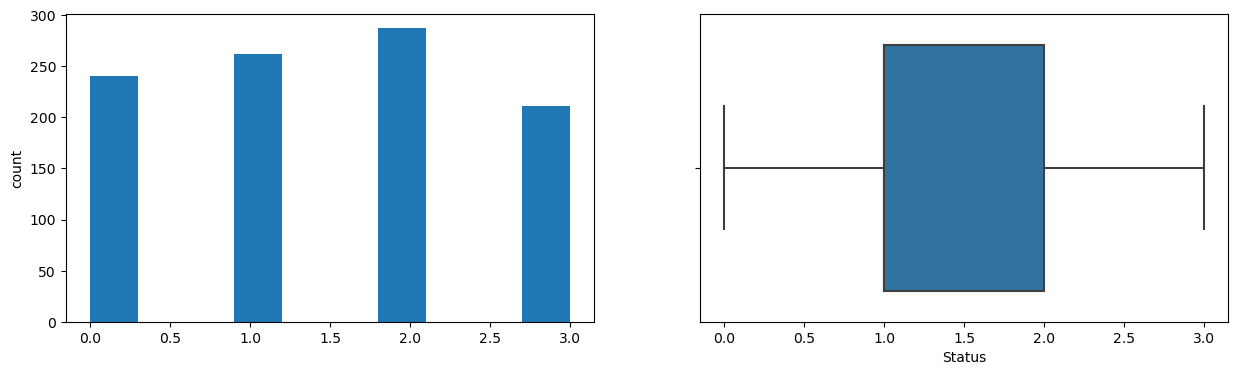

Kelamin
Skew : 0.08


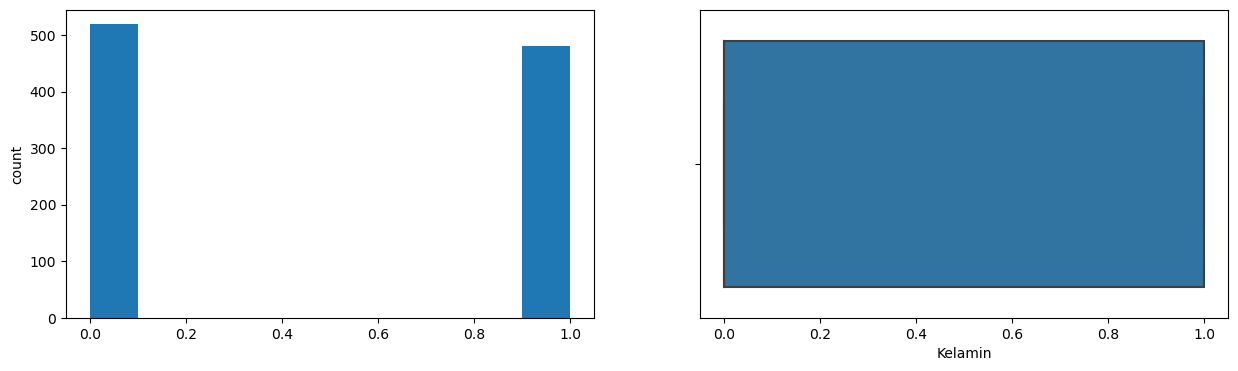

Memiliki_Mobil
Skew : 0.19


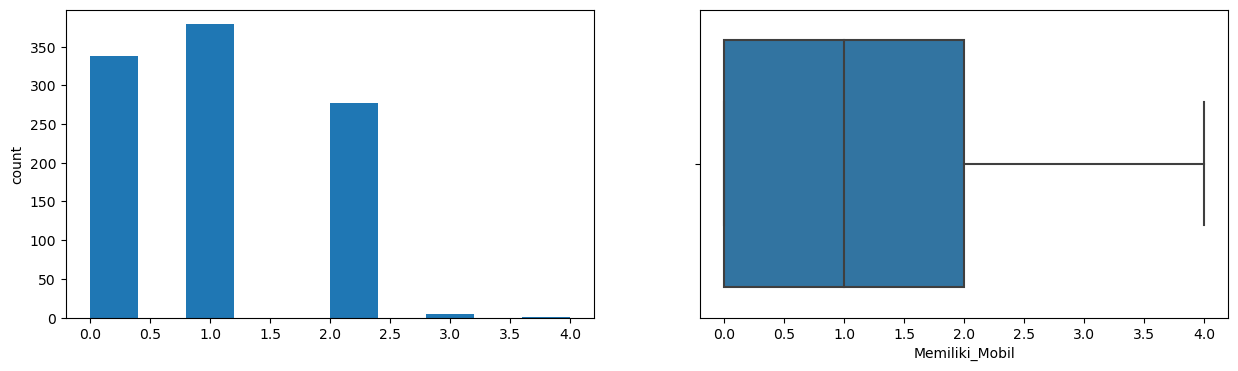

Penghasilan
Skew : 0.22


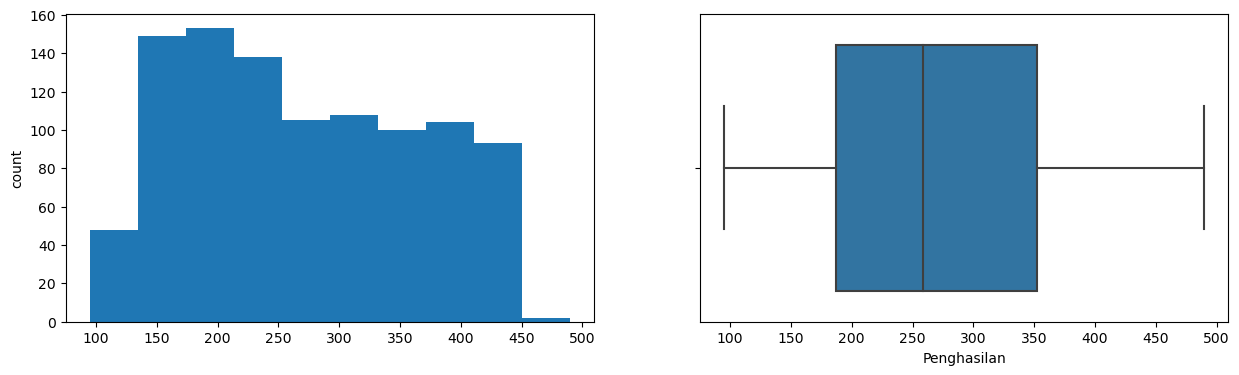

Beli_Mobil
Skew : -0.55


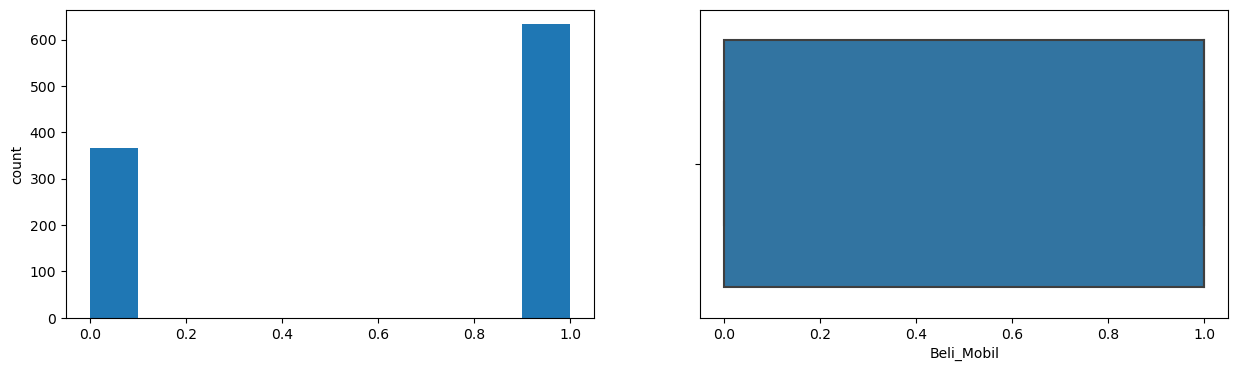

In [15]:
for col in num_cols:
    print(col)
    print('Skew :', round(data_baru[col].skew(), 2))
    
    plt.figure(figsize=(15, 4))
    
    # Histogram plot
    plt.subplot(1, 2, 1)
    data_baru[col].hist(grid=False)
    plt.ylabel('count')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_baru[col])
    
    plt.show()

1. Pada Usia ada outlier yang bisa dihapus, karena berupa noise. (orang berumur 140 dan 160 tahun)
2. Laki atau pun perempuan tidak berbanding jauh
3. penghasilan memiliki skew (+), berarti penghasilan memiliki berat ke kiri ( dibawah 260 jt)

Menghilangkan outlier pada data Usia, dengan cara
Data yang berada di luar range lower_bound dan upper_bound akan dianggap sebagai outlier dan dihapus dari DataFrame.

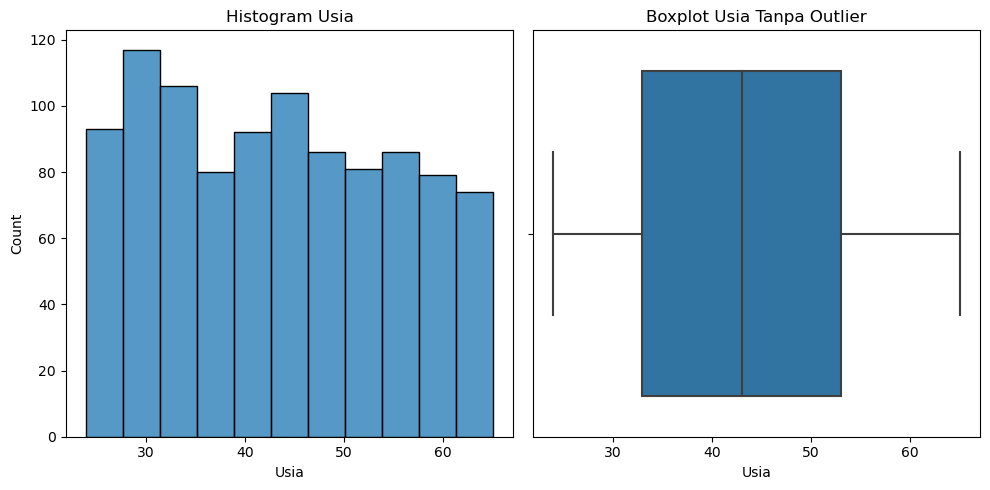

In [16]:
# Misalkan data usia disimpan dalam DataFrame 'data_baru' dengan kolom 'Usia'
# Hitung Q1 (Kuartil pertama) dan Q3 (Kuartil ketiga)
Q1 = data_baru['Usia'].quantile(0.25)
Q3 = data_baru['Usia'].quantile(0.75)

# Hitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk deteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus data yang berada di luar range (outlier)
data_baru_clean = data_baru[(data_baru['Usia'] >= lower_bound) & (data_baru['Usia'] <= upper_bound)]

# Visualisasi ulang setelah menghapus outlier
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Plot histogram dan boxplot tanpa outlier
plt.subplot(1, 2, 1)
sns.histplot(data_baru_clean['Usia'], kde=False)
plt.title('Histogram Usia')

plt.subplot(1, 2, 2)
sns.boxplot(x=data_baru_clean['Usia'])
plt.title('Boxplot Usia Tanpa Outlier')

plt.tight_layout()
plt.show()


1. Q1 dan Q3 adalah kuartil pertama dan ketiga yang dihitung menggunakan quantile.
2. IQR digunakan untuk menentukan batas atas dan bawah outlier.

In [17]:
cat_cols=data_baru_clean.select_dtypes(include=['object']).columns
num_cols = data_baru_clean.select_dtypes(include=np.number).columns.tolist()

print("categorical variables:")
print(cat_cols)

print("numerical catagories:")
print(num_cols)

categorical variables:
Index([], dtype='object')
numerical catagories:
['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan', 'Beli_Mobil']


disini sebenarnya sama seperti diatas tadi,tetapi cuma memastikan bahwa datanya tidak berubah karena pakai 'data_baru_clean'.

In [41]:
data_baru_clean.describe()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil,Cluster
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,43.323647,1.469940,0.480962,0.953908,270.430862,0.634269,1.366733
std,11.774139,1.073338,0.499888,0.801127,95.026802,0.481876,0.982176
min,24.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,187.250000,0.000000,1.000000
50%,43.000000,1.000000,0.000000,1.000000,259.000000,1.000000,1.000000
75%,53.000000,2.000000,1.000000,2.000000,352.750000,1.000000,2.000000
max,65.000000,3.000000,1.000000,4.000000,490.000000,1.000000,3.000000


In [18]:
correlation = data_baru_clean.corr()

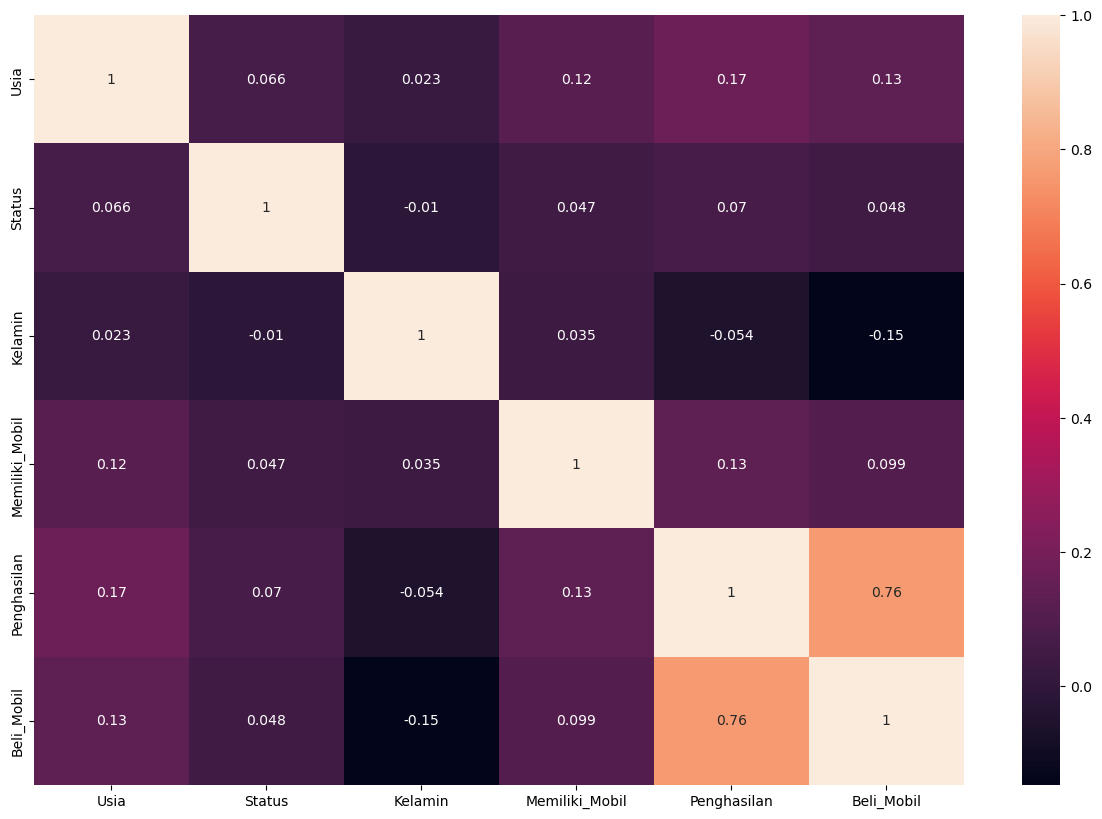

In [19]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.show()

Disini, 'Penghasilan' dan 'Usia' memiliki korelasi/hubungan yang positif dengan 'Membeli Mobil'

### Selanjutnya kita akan melakukan scaling

In [20]:
data_baru_clean

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,32,1,0,0,240,1
1,49,2,1,1,100,0
2,52,1,0,2,250,1
3,26,2,1,1,130,0
4,45,3,0,2,237,1
...,...,...,...,...,...,...
995,51,0,1,2,293,1
996,61,1,0,2,275,1
997,45,1,0,0,406,1
998,48,0,1,2,432,1


Scaling disini untuk :
1. Mencegah fitur dengan skala besar mendominasi pengukuran jarak.
2. Memastikan semua fitur berkontribusi secara proporsional dalam pembentukan cluster.
3. Membantu algoritma seperti K-Means mencapai konvergensi lebih cepat.
4. Menghindari Penemuan Cluster yang Salah akibat perbedaan skala antar fitur.

In [21]:
# Inisialisasi minmaxscaler
scaler = MinMaxScaler()

# Melakukan scaling pada dataset
scaled_data = scaler.fit_transform(data_baru_clean)

# Jika ingin menyimpan dalam dataframe
scaled_data_df = pd.DataFrame(scaled_data, columns=data_baru_clean.columns)


In [22]:
scaled_data_df

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,0.195122,0.333333,0.0,0.00,0.367089,1.0
1,0.609756,0.666667,1.0,0.25,0.012658,0.0
2,0.682927,0.333333,0.0,0.50,0.392405,1.0
3,0.048780,0.666667,1.0,0.25,0.088608,0.0
4,0.512195,1.000000,0.0,0.50,0.359494,1.0
...,...,...,...,...,...,...
993,0.658537,0.000000,1.0,0.50,0.501266,1.0
994,0.902439,0.333333,0.0,0.50,0.455696,1.0
995,0.512195,0.333333,0.0,0.00,0.787342,1.0
996,0.585366,0.000000,1.0,0.50,0.853165,1.0


### Melakukan Modelling

In [23]:
scaler = MinMaxScaler()
col_box = [
    'Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan', 'Beli_Mobil'
]


df_pca = scaled_data_df[col_box]
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_pca)
# pca_data = pd.DataFrame(scaled_data_df, columns=["pc1", "pc2"])  # Menggunakan "pc1" dan "pc2" karena kita hanya memiliki 2 komponen
print("PCA explained variance ratio:\n", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))


PCA explained variance ratio:
 0.377 0.285


In [24]:
pca_data

array([[-0.49658729,  0.27070524],
       [ 0.88613437, -0.00750148],
       [-0.55443611,  0.18273696],
       ...,
       [-0.64437081,  0.12969395],
       [-0.07844415, -0.71220044],
       [-0.07427563, -0.69676142]])

Clusterning K Means

In [43]:
inertia = []
scores = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(scaled_data_df)
    inertia.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(pca_data, labels)
    scores.append(silhouette_avg)
    print('inertia score for n_cluster = ' + str(i) + ' is ' + str(inertia))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))

inertia score for n_cluster = 2 is [515.5560087237632]
silhoutte score for n_clusters = 2 is 0.5725532964258889
inertia score for n_cluster = 3 is [515.5560087237632, 359.50315454427306]
silhoutte score for n_clusters = 3 is 0.7538913473453491
inertia score for n_cluster = 4 is [515.5560087237632, 359.50315454427306, 269.91996817375]
silhoutte score for n_clusters = 4 is 0.9040586604750782
inertia score for n_cluster = 5 is [515.5560087237632, 359.50315454427306, 269.91996817375, 234.63954692975548]
silhoutte score for n_clusters = 5 is 0.6140919658193283
inertia score for n_cluster = 6 is [515.5560087237632, 359.50315454427306, 269.91996817375, 234.63954692975548, 203.71755405415448]
silhoutte score for n_clusters = 6 is 0.3857527001982643
inertia score for n_cluster = 7 is [515.5560087237632, 359.50315454427306, 269.91996817375, 234.63954692975548, 203.71755405415448, 183.62762673961637]
silhoutte score for n_clusters = 7 is 0.22216851547023983
inertia score for n_cluster = 8 is [515

Dari hasil sillhoutte score diatas dilihat cluster terbaik adalah 4

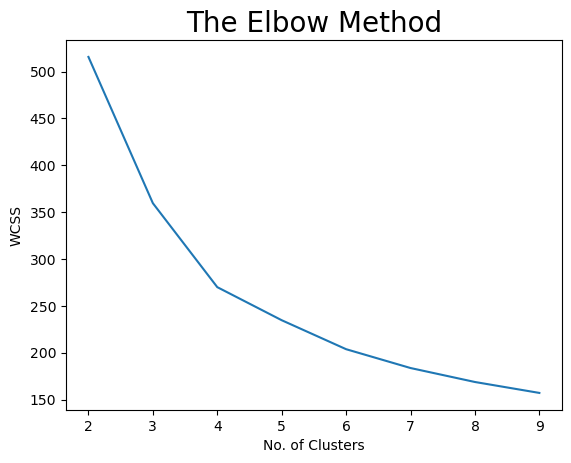

In [26]:
# Visualisasikan Elbow Methodnya
plt.plot(range(2, 10), inertia)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

Memvisualisasikan lagi.

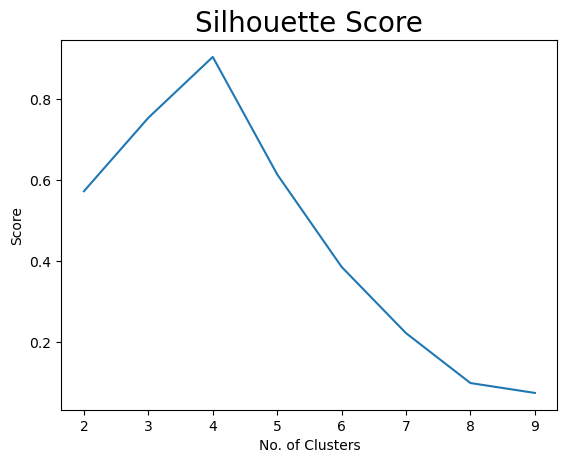

In [27]:
# Visualisasikan Silhouette Score
plt.plot(range(2, 10), scores)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')

kmeans.fit_transform(scaled_data_df)

array([[1.45971648, 0.44998326, 1.07695418, 1.13085068],
       [0.35448433, 1.53435789, 1.04788731, 1.1763872 ],
       [1.4890094 , 0.41639566, 1.09188387, 1.07037962],
       ...,
       [1.5551504 , 0.37476872, 1.18737   , 1.06402844],
       [1.32467636, 1.19081973, 1.6585231 , 0.60481499],
       [1.24299086, 1.1282851 , 1.60400789, 0.53883003]])

karena terbukti siluet scorenya yang paling mantep elbownya di 4, maka kita masukkan 4.

In [29]:
# Membangun Model berdasarkan pertimbangan Metode Elbow dan Skor Siluet
# Dengan menggunakan banyak cluster sebanyak 4
kmeansmodel = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeansmodel.fit_predict(pca_data)


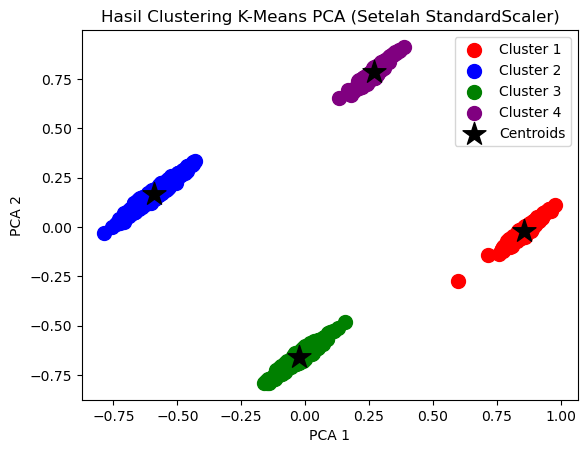

In [30]:
plt.scatter(pca_data[y_kmeans == 0, 0], pca_data[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca_data[y_kmeans == 1, 0], pca_data[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca_data[y_kmeans == 2, 0], pca_data[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(pca_data[y_kmeans == 3, 0], pca_data[y_kmeans == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')

# Display the cluster centers
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids', marker = '*')
plt.title('Hasil Clustering K-Means PCA (Setelah StandardScaler)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


In [32]:
clusters = kmeansmodel.labels_
data_baru_clean['Cluster'] = clusters
Cluster_1 = data_baru_clean[(data_baru_clean['Cluster']== 0)]
Cluster_2 = data_baru_clean[(data_baru_clean['Cluster']== 1)]
Cluster_3 = data_baru_clean[(data_baru_clean['Cluster']== 2)]
Cluster_4 = data_baru_clean[(data_baru_clean['Cluster']== 3)]

In [33]:
data_baru_clean.head()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil,Cluster
0,32,1,0,0,240,1,1
1,49,2,1,1,100,0,0
2,52,1,0,2,250,1,1
3,26,2,1,1,130,0,0
4,45,3,0,2,237,1,1


In [34]:
len(Cluster_1),len(Cluster_2),len(Cluster_3),len(Cluster_4)

(211, 364, 269, 154)

In [35]:
Cluster_1.describe()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil,Cluster
count,211.000000,211.000000,211.0,211.000000,211.000000,211.0,211.0
mean,39.981043,1.412322,1.0,0.881517,177.018957,0.0,0.0
std,11.043189,1.044550,0.0,0.768542,41.209680,0.0,0.0
min,24.000000,0.000000,1.0,0.000000,95.000000,0.0,0.0
25%,31.000000,0.000000,1.0,0.000000,152.500000,0.0,0.0
50%,38.000000,2.000000,1.0,1.000000,173.000000,0.0,0.0
75%,48.500000,2.000000,1.0,1.000000,200.000000,0.0,0.0
max,65.000000,3.000000,1.0,3.000000,450.000000,0.0,0.0


In [36]:
Cluster_2.describe()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil,Cluster
count,364.000000,364.000000,364.0,364.000000,364.000000,364.0,364.0
mean,43.054945,1.519231,0.0,0.978022,319.043956,1.0,1.0
std,11.523709,1.050863,0.0,0.795691,72.617783,0.0,0.0
min,24.000000,0.000000,0.0,0.000000,160.000000,1.0,1.0
25%,33.000000,1.000000,0.0,0.000000,259.000000,1.0,1.0
50%,43.000000,2.000000,0.0,1.000000,313.500000,1.0,1.0
75%,53.000000,2.000000,0.0,2.000000,377.250000,1.0,1.0
max,65.000000,3.000000,0.0,4.000000,490.000000,1.0,1.0


In [37]:
Cluster_3.describe()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil,Cluster
count,269.000000,269.000000,269.0,269.000000,269.000000,269.0,269.0
mean,46.449814,1.494424,1.0,1.063197,334.141264,1.0,2.0
std,11.266873,1.134996,0.0,0.796273,68.570930,0.0,0.0
min,24.000000,0.000000,1.0,0.000000,180.000000,1.0,2.0
25%,37.000000,0.000000,1.0,0.000000,282.000000,1.0,2.0
50%,48.000000,1.000000,1.0,1.000000,340.000000,1.0,2.0
75%,55.000000,3.000000,1.0,2.000000,392.000000,1.0,2.0
max,65.000000,3.000000,1.0,3.000000,450.000000,1.0,2.0


In [38]:
Cluster_4.describe()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil,Cluster
count,154.000000,154.000000,154.0,154.000000,154.000000,154.0,154.0
mean,43.077922,1.389610,0.0,0.805195,172.227273,0.0,3.0
std,12.873712,1.056023,0.0,0.840774,35.573825,0.0,0.0
min,24.000000,0.000000,0.0,0.000000,98.000000,0.0,3.0
25%,31.000000,0.250000,0.0,0.000000,146.500000,0.0,3.0
50%,43.000000,1.000000,0.0,1.000000,170.500000,0.0,3.0
75%,55.000000,2.000000,0.0,2.000000,191.000000,0.0,3.0
max,65.000000,3.000000,0.0,2.000000,329.000000,0.0,3.0


### Hierarki Clustering

In [67]:
linkage_col = ['ward', 'complete', 'average', 'single']
scores_all = [[] for _ in range(len(linkage_col))]
for j in range (len(linkage_col)): # Iterasi melalui setiap metode linkage. Kode mencetak metode yang digunakan pada iterasinya.
    print('Linkage: ', linkage_col[j])
    scores = []
    for i in range(2, 10): # Pada setiap metode linkage, dilakukan perhitungan **silhouette score** untuk jumlah kluster dari 2 hingga 9.
                           # Skor ini mengukur seberapa baik kluster terbentuk, semakin tinggi semakin baik.
        AC = AgglomerativeClustering(n_clusters=i, linkage = linkage_col[j]) # Menggunakan Ward Method.
        AC.fit(pca_data)
        labels = AC.labels_
        silhouette_avg = silhouette_score(pca_data, labels)
        scores.append(silhouette_avg)
        print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))
    print("\n##########################\n")
    scores_all[j] = scores

Linkage:  ward
silhoutte score for n_clusters = 2 is 0.5725532964259153
silhoutte score for n_clusters = 3 is 0.7538913473454271
silhoutte score for n_clusters = 4 is 0.9040586604751563
silhoutte score for n_clusters = 5 is 0.7782235019147004
silhoutte score for n_clusters = 6 is 0.6841622164510914
silhoutte score for n_clusters = 7 is 0.5998026770620897
silhoutte score for n_clusters = 8 is 0.5852110187133566
silhoutte score for n_clusters = 9 is 0.5225647931465565

##########################

Linkage:  complete
silhoutte score for n_clusters = 2 is 0.5725532964259153
silhoutte score for n_clusters = 3 is 0.6441513671766887
silhoutte score for n_clusters = 4 is 0.9040586604751563
silhoutte score for n_clusters = 5 is 0.8630976541525425
silhoutte score for n_clusters = 6 is 0.7266209775458019
silhoutte score for n_clusters = 7 is 0.6080763123567144
silhoutte score for n_clusters = 8 is 0.5545578649045176
silhoutte score for n_clusters = 9 is 0.4914183121706428

########################

1. **Linkage Methods**: Ada 4 metode linkage yang digunakan (`ward`, `complete`, `average`, `single`). Metode ini menentukan cara menghitung jarak antar kluster dalam **Agglomerative Clustering**.
   
2. **Loop Pertama**: Iterasi melalui setiap metode linkage. Kode mencetak metode yang digunakan pada iterasi tersebut.

3. **Loop Kedua**: Pada setiap metode linkage, dilakukan perhitungan **silhouette score** untuk jumlah kluster dari 2 hingga 9. Skor ini mengukur seberapa baik kluster terbentuk, semakin tinggi semakin baik.

4. **Hasil Akhir**: Setiap **silhouette score** dicetak untuk setiap metode dan jumlah kluster, kemudian disimpan dalam `scores_all`.


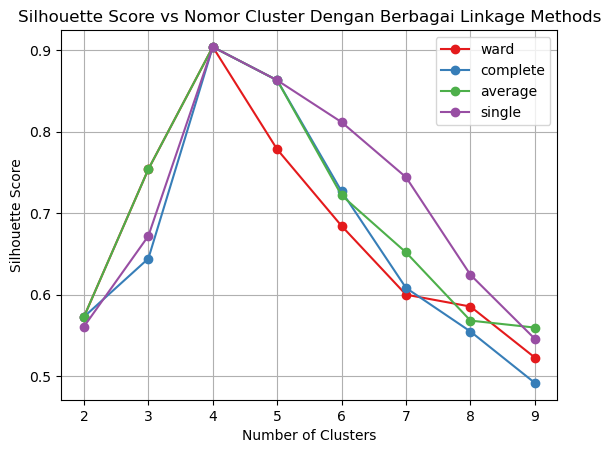

In [76]:
colors = sns.color_palette("Set1", len(linkage_col))

for j in range(len(linkage_col)):
    plt.plot(range(2, 10), scores_all[j], marker='o', color=colors[j], label=linkage_col[j])

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Nomor Cluster Dengan Berbagai Linkage Methods')
plt.legend()
plt.grid(True)
plt.show()

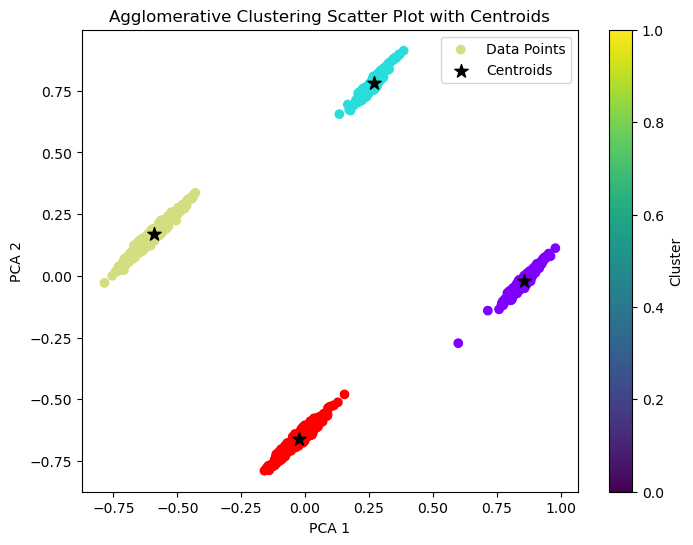

In [69]:
# Membuat 4 kluster dengan metode linkage 'single'
n_cluster = 4
AC = AgglomerativeClustering(n_clusters=n_cluster, linkage='single')
labels = AC.fit_predict(pca_data)  # Menghasilkan label kluster untuk setiap data

# Menggabungkan data PCA dengan label kluster
df_train_with_labels = np.column_stack((pca_data, labels))

centroids = []
for cluster_label in range(n_cluster):
    # Mengambil data untuk setiap kluster
    cluster_data = df_train_with_labels[df_train_with_labels[:, -1] == cluster_label]
    
    # Menghitung rata-rata (centroid) dari data di setiap kluster
    cluster_centroid = np.mean(cluster_data[:, :-1], axis=0)
    centroids.append(cluster_centroid)

# Mengubah list centroid menjadi array numpy
centroids = np.array(centroids)

# Visualisasi data dan centroid
plt.figure(figsize=(8, 6))

x = pca_data[:, 0]  # Data PCA komponen 1
y = pca_data[:, 1]  # Data PCA komponen 2

# Plot scatter data poin dengan warna berdasarkan kluster
plt.scatter(x, y, c=labels, cmap='rainbow', label='Data Points')

# Plot centroid dengan tanda bintang hitam
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='*', s=100, label='Centroids')

plt.title('Agglomerative Clustering Scatter Plot with Centroids')  # Judul plot
plt.xlabel('PCA 1')  # Label sumbu x
plt.ylabel('PCA 2')  # Label sumbu y
plt.colorbar(label='Cluster')  # Menambahkan bar warna untuk kluster
plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan plot


In [70]:
linked = sch.linkage(pca_data, 'single')

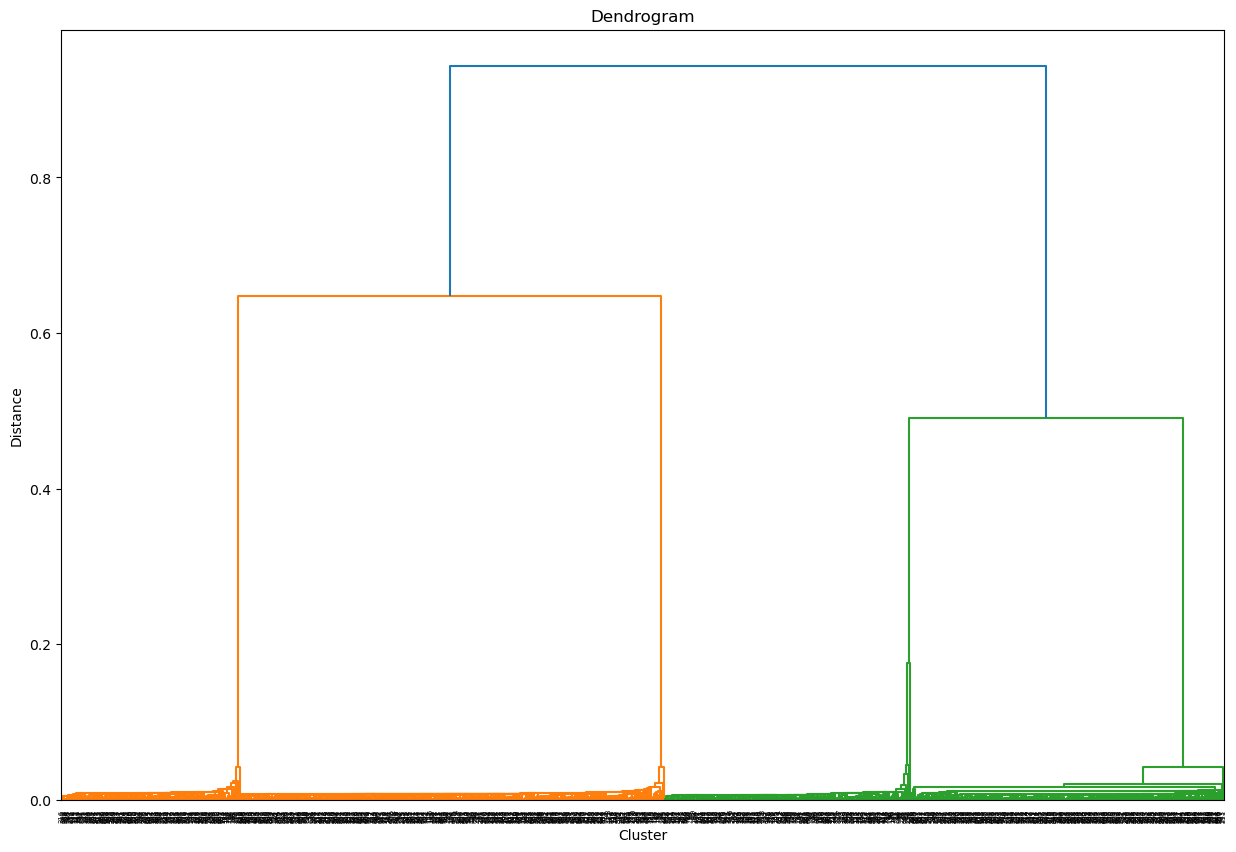

In [71]:
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(linked, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Cluster')
plt.ylabel('Distance')
plt.axhline(y=10, color='black', linestyle='--') # datanya disini dipecah menjadi 2
plt.show()

DBScan

In [72]:
epsilon = [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
min_samples = [10, 15, 20, 25]

sil_avg = []
max_value = (0, 0, 0, -1)  # Inisialisasi max_value dengan skor siluet negatif

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples=min_samples[j], eps=epsilon[i]).fit(pca_data)

        # Periksa apakah ada setidaknya dua cluster
        unique_labels = set(db.labels_)
        if len(unique_labels) >= 2:
            core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
            core_samples_mask[db.core_sample_indices_] = True
            labels = db.labels_

            # Jumlah cluster dalam label, mengabaikan noise jika ada.
            n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)

            silhouette_avg = silhouette_score(pca_data, labels)
            sil_avg.append(silhouette_avg)

            if silhouette_avg > max_value[3]:
                max_value = (epsilon[i], min_samples[j], n_clusters_, silhouette_avg)

print("epsilon =", max_value[0],
      "\nmin_samples =", max_value[1],
      "\njumlah cluster =", max_value[2],
      "\nskor siluet rata-rata = %.4f" % max_value[3])


epsilon = 0.25 
min_samples = 10 
number of clusters = 4 
average silhouette score = 0.9041


In [73]:
db=DBSCAN(eps=0.25, min_samples=10, metric='euclidean')
db.fit(pca_data)

DBSCAN(eps=0.25, min_samples=10)

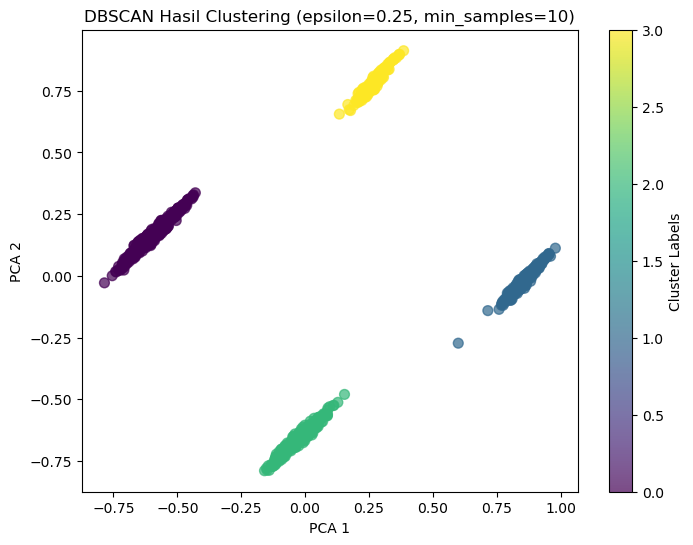

In [75]:
best_epsilon = max_value[0]
best_min_samples = max_value[1]
best_labels = db.labels_ 

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=best_labels, cmap='viridis', s=50, alpha=0.7)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DBSCAN Hasil Clustering (epsilon={}, min_samples={})'.format(best_epsilon, best_min_samples))

plt.colorbar(label='Cluster Labels')
plt.show()

Kegunaan DBSCAN disini untuk menangani Noise serta mendeteksi cluster dengan bentuk yang beragam.